In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ind = 1
df = pd.read_csv(f'/content/drive/MyDrive/ResearchProject/HAR/ppg+dalia/data/PPG_FieldStudy/S{ind}/S{ind}_E4/ACC_with_activity.csv')

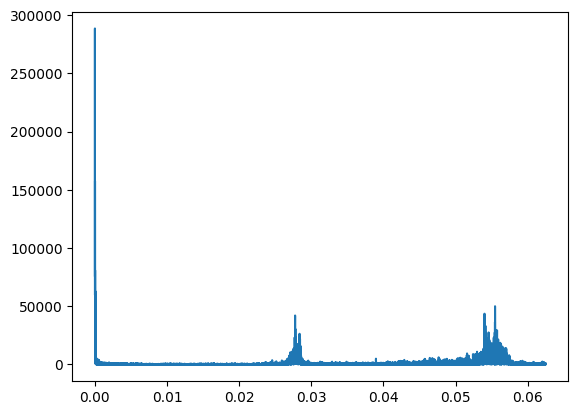

In [ ]:
n = len(df['magnitude'])
f_hat = np.fft.fftn(df['acc_'])
PSD = f_hat * np.conj(f_hat) / n
freq = (1/n)  * np.arange(n)
L = np.arange(1, np.floor(int(n/16)), dtype='int')
plt.plot(freq[L], PSD[L])
plt.show()

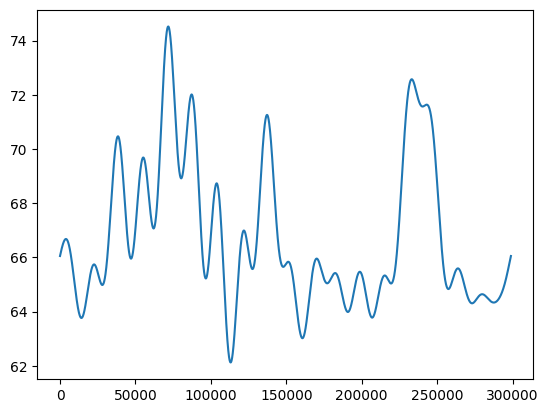

In [ ]:
indices = PSD > 50020
PSD_filtered = PSD * indices
f_hat_filtered = f_hat * indices
f_filtered = np.fft.ifft(f_hat_filtered)
plt.plot(f_filtered)
plt.show()

In [ ]:
first_act_index = df[df['activity'] == 1].index[0]
first_act_index

53568

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


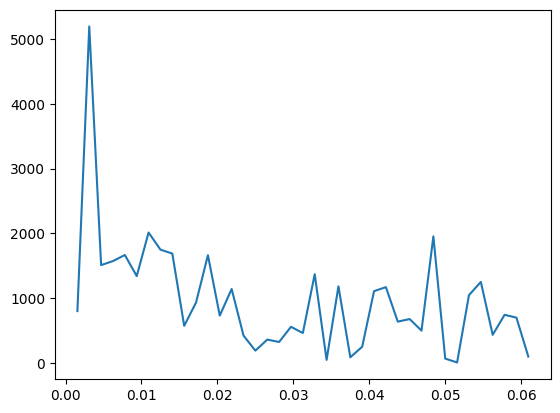

In [ ]:
window = df[first_act_index:first_act_index + 640]
window_f_hat = np.fft.fft(window['magnitude'])
window_PSD = window_f_hat * np.conj(window_f_hat) / len(window['magnitude'])
window_freq = (1/len(window['magnitude']))  * np.arange(len(window['magnitude']))
window_L = np.arange(1, np.floor(int(len(window['magnitude'])/16)), dtype='int')
plt.plot(window_freq[window_L], window_PSD[window_L])
plt.show()

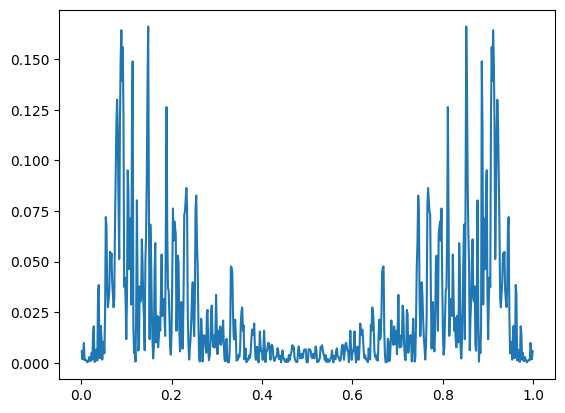

In [ ]:
baseline = 6951 * 32
window = df[baseline:baseline + 640]
window_f_hat = np.fft.fft(window['magnitude'])
window_PSD = window_f_hat * np.conj(window_f_hat) / len(window['magnitude'])
window_freq = (1/len(window['magnitude']))  * np.arange(len(window['magnitude']))
window_L = np.arange(1, np.floor(int(len(window['magnitude']))), dtype='int')
plt.plot(window_freq[window_L], window_PSD[window_L] / 640)
plt.show()